In [5]:
MONTH = 2
YEAR = 2022

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

dt = datetime.datetime.today()

BOOL_COLUMNS = {
    'gmo','adult','nuclear','coal','pesticides','furLeather',
    'militaryContract','tobacco','smallArms','palmOil','socialScore',
    'catholic','animalTesting','gambling','alcoholic','controversialWeapons'
}

ALL_COLUMNS = {'palmOil', 'peerCount', 'environmentScore', 'militaryContract',
       'esgPerformance', 'coal', 'peerGroup', 'furLeather', 'gambling',
       'animalTesting', 'catholic', 'nuclear', 'totalEsg', 'adult',
       'environmentPercentile', 'highestControversy', 'socialScore',
       'percentile', 'alcoholic', 'socialPercentile', 'pesticides',
       'governancePercentile', 'controversialWeapons', 'gmo', 'smallArms',
       'tobacco', 'governanceScore', 'Stock Ticker', 'Sector', 'Name'
}

USER_PATH = '/Users/MichaelCalmette/Documents/Finance Research/ESG Data Files/'
DATE_PATH = "esg-{}-{}.csv".format(MONTH, YEAR)
FILE_PATH = os.path.join(USER_PATH,DATE_PATH)

In [7]:
# Download csv data
df = pd.read_csv(FILE_PATH)

In [8]:
df

,adult,militaryContract,coal,socialPercentile,furLeather,environmentPercentile,socialScore,esgPerformance,environmentScore,totalEsg,...,gambling,alcoholic,governancePercentile,pesticides,palmOil,tobacco,smallArms,Stock Ticker,Sector,Name
0,False,False,False,NaN,False,NaN,16.68,OUT_PERF,7.72,31.31,...,False,False,NaN,False,False,False,False,DPZ,Consumer Discretionary,Domino's Pizza
1,False,False,False,NaN,False,NaN,8.88,OUT_PERF,21.98,38.81,...,False,False,NaN,False,False,False,False,APA,Energy,APA Corporation
2,False,False,False,NaN,False,NaN,5.41,UNDER_PERF,1.61,12.41,...,False,False,NaN,False,False,False,False,MSCI,Financials,MSCI
3,False,False,False,NaN,False,NaN,5.50,AVG_PERF,11.51,24.81,...,False,False,NaN,False,False,False,False,EMN,Materials,Eastman Chemical
4,False,False,False,NaN,False,NaN,6.75,UNDER_PERF,0.12,16.75,...,False,False,NaN,False,False,False,False,NFLX,Communication Services,Netflix
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,0,False,0,0.03,0.00,False,False,False,...,False,34.12,NaN,False,False,False,False,CVS,Health Care,CVS Health
502,False,False,0,False,0,0.06,0.00,False,False,False,...,False,34.56,NaN,False,False,False,False,NLSN,Industrials,Nielsen Holdings
503,False,False,0,False,0,0.07,0.00,False,False,False,...,False,1.87,NaN,False,False,False,False,RHI,Industrials,Robert Half International
504,False,False,0,False,0,17.86,0.00,False,True,False,...,False,85.34,LEAD_PERF,True,False,False,False,FMC,Materials,FMC Corporation


In [9]:
df = df.drop_duplicates() #Ensure no duplicates
df

,adult,militaryContract,coal,socialPercentile,furLeather,environmentPercentile,socialScore,esgPerformance,environmentScore,totalEsg,...,gambling,alcoholic,governancePercentile,pesticides,palmOil,tobacco,smallArms,Stock Ticker,Sector,Name
0,False,False,False,NaN,False,NaN,16.68,OUT_PERF,7.72,31.31,...,False,False,NaN,False,False,False,False,DPZ,Consumer Discretionary,Domino's Pizza
1,False,False,False,NaN,False,NaN,8.88,OUT_PERF,21.98,38.81,...,False,False,NaN,False,False,False,False,APA,Energy,APA Corporation
2,False,False,False,NaN,False,NaN,5.41,UNDER_PERF,1.61,12.41,...,False,False,NaN,False,False,False,False,MSCI,Financials,MSCI
3,False,False,False,NaN,False,NaN,5.50,AVG_PERF,11.51,24.81,...,False,False,NaN,False,False,False,False,EMN,Materials,Eastman Chemical
4,False,False,False,NaN,False,NaN,6.75,UNDER_PERF,0.12,16.75,...,False,False,NaN,False,False,False,False,NFLX,Communication Services,Netflix
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,0,False,0,0.03,0.00,False,False,False,...,False,34.12,NaN,False,False,False,False,CVS,Health Care,CVS Health
502,False,False,0,False,0,0.06,0.00,False,False,False,...,False,34.56,NaN,False,False,False,False,NLSN,Industrials,Nielsen Holdings
503,False,False,0,False,0,0.07,0.00,False,False,False,...,False,1.87,NaN,False,False,False,False,RHI,Industrials,Robert Half International
504,False,False,0,False,0,17.86,0.00,False,True,False,...,False,85.34,LEAD_PERF,True,False,False,False,FMC,Materials,FMC Corporation


Categorical Data is data that is used to group information with similar characteristics. Most models (including ML) cannot work with categorical variables unless we convert them to numerical values. Categorical variables can be divided into nominal and ordinal variables. Nominal have no particular order, while ordinal have some order between values.

In [37]:
#df.drop(columns=['Sector','Name','Sector','peerGroup'])

Get rid of NAN

In [6]:
df = df.dropna(axis = 1, how = 'all')

In [7]:
df.isnull().sum()

gmo                       0
adult                     0
governancePercentile     83
nuclear                   0
environmentPercentile    83
environmentScore          0
socialPercentile         83
coal                      0
pesticides                0
furLeather                0
militaryContract          0
tobacco                   0
peerCount                 0
totalEsg                  0
governanceScore           0
highestControversy        0
smallArms                 0
palmOil                   0
socialScore               0
peerGroup                 0
catholic                  0
percentile                0
esgPerformance           79
animalTesting             0
gambling                  0
alcoholic                 0
controversialWeapons      0
Stock Ticker              0
Sector                    0
Name                      0
dtype: int64

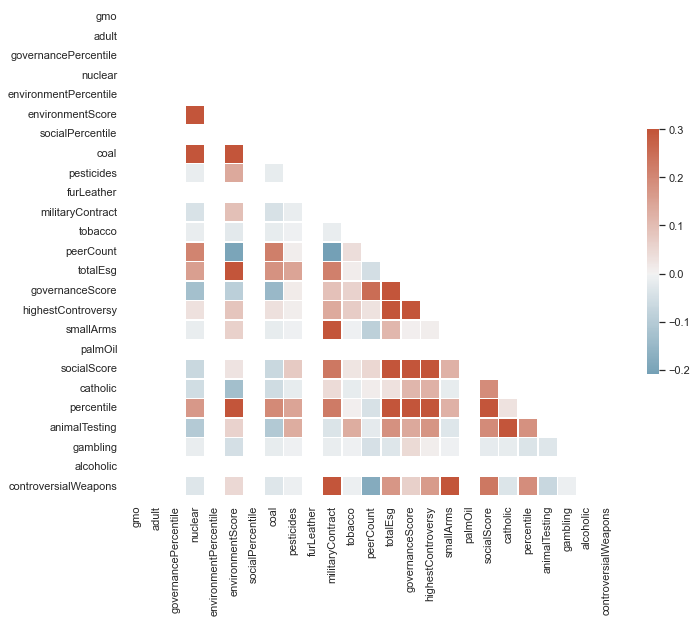

In [10]:
#Need to work with categorical columns
sns.set_theme(style="white")
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [8]:
#df.drop(columns = ['governancePercentile','environmentPercentile','esgPerformance','socialPercentile'])

In [41]:
# drop the duplicated column `"education-num"` as stated in the first notebook
esg_data = df
target_name = "environmentScore"
target = esg_data[target_name]

data = df#.drop(columns=[target_name])

In [43]:
data.drop(columns = ['governancePercentile','environmentPercentile','esgPerformance','socialPercentile'])

,gmo,adult,nuclear,environmentScore,coal,pesticides,furLeather,militaryContract,tobacco,peerCount,...,peerGroup,catholic,percentile,animalTesting,gambling,alcoholic,controversialWeapons,Stock Ticker,Sector,Name
0,False,False,False,0.15,False,False,False,False,False,105,...,Software & Services,False,21.20,False,False,False,False,ATVI,Communication Services,Activision Blizzard
1,False,False,False,3.89,False,False,False,False,False,108,...,Real Estate,False,6.10,False,False,False,False,KIM,Real Estate,Kimco Realty
2,False,False,False,2.40,False,False,False,False,False,55,...,Technology Hardware,False,1.74,False,False,False,False,CDW,Information Technology,CDW
3,False,False,False,3.03,False,False,False,False,False,58,...,Healthcare,True,46.02,True,False,False,False,ABT,Health Care,Abbott Laboratories
4,False,False,False,8.73,False,False,False,False,False,9,...,Homebuilders,False,27.59,False,False,False,False,PHM,Consumer Discretionary,PulteGroup
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,False,False,False,0.03,False,False,False,False,False,58,...,Healthcare,False,34.12,False,False,False,False,CVS,Health Care,CVS Health
248,False,False,False,0.06,False,False,False,False,False,32,...,Commercial Services,False,34.56,False,False,False,False,NLSN,Industrials,Nielsen Holdings
249,False,False,False,0.07,False,False,False,False,False,32,...,Commercial Services,False,1.87,False,False,False,False,RHI,Industrials,Robert Half International
250,False,False,False,17.86,False,True,False,False,False,77,...,Chemicals,False,85.34,True,False,False,False,FMC,Materials,FMC Corporation


In [44]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(data)
categorical_columns = categorical_columns_selector(data)

In [45]:
data

,gmo,adult,governancePercentile,nuclear,environmentPercentile,environmentScore,socialPercentile,coal,pesticides,furLeather,...,catholic,percentile,esgPerformance,animalTesting,gambling,alcoholic,controversialWeapons,Stock Ticker,Sector,Name
0,False,False,NaN,False,NaN,0.15,NaN,False,False,False,...,False,21.20,UNDER_PERF,False,False,False,False,ATVI,Communication Services,Activision Blizzard
1,False,False,NaN,False,NaN,3.89,NaN,False,False,False,...,False,6.10,UNDER_PERF,False,False,False,False,KIM,Real Estate,Kimco Realty
2,False,False,NaN,False,NaN,2.40,NaN,False,False,False,...,False,1.74,LAG_PERF,False,False,False,False,CDW,Information Technology,CDW
3,False,False,NaN,False,NaN,3.03,NaN,False,False,False,...,True,46.02,AVG_PERF,True,False,False,False,ABT,Health Care,Abbott Laboratories
4,False,False,NaN,False,NaN,8.73,NaN,False,False,False,...,False,27.59,AVG_PERF,False,False,False,False,PHM,Consumer Discretionary,PulteGroup
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,False,False,0.0,False,0.0,0.03,0.0,False,False,False,...,False,34.12,NaN,False,False,False,False,CVS,Health Care,CVS Health
248,False,False,0.0,False,0.0,0.06,0.0,False,False,False,...,False,34.56,NaN,False,False,False,False,NLSN,Industrials,Nielsen Holdings
249,False,False,0.0,False,0.0,0.07,0.0,False,False,False,...,False,1.87,NaN,False,False,False,False,RHI,Industrials,Robert Half International
250,False,False,0.0,False,0.0,17.86,0.0,False,True,False,...,False,85.34,LEAD_PERF,True,False,False,False,FMC,Materials,FMC Corporation


In [46]:
numerical_columns

['gmo',
 'adult',
 'governancePercentile',
 'nuclear',
 'environmentPercentile',
 'environmentScore',
 'socialPercentile',
 'coal',
 'pesticides',
 'furLeather',
 'militaryContract',
 'tobacco',
 'peerCount',
 'totalEsg',
 'governanceScore',
 'highestControversy',
 'smallArms',
 'palmOil',
 'socialScore',
 'catholic',
 'percentile',
 'animalTesting',
 'gambling',
 'alcoholic',
 'controversialWeapons']

In [47]:
categorical_columns

['peerGroup', 'esgPerformance', 'Stock Ticker', 'Sector', 'Name']

In [48]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

In [49]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

In [50]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=42)

In [51]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(data_train, target_train)

ValueError: could not convert string to float: 'Pharmaceuticals'